Pierre Navaro - [Institut de Recherche Mathématique de Rennes](https://irmar.univ-rennes1.fr) - [CNRS](http://www.cnrs.fr/)

# References
- Simple examples with increasing difficulty https://matplotlib.org/examples/index.html
- Gallery https://matplotlib.org/gallery.html
- A [matplotlib tutorial](http://nbviewer.ipython.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-4-Matplotlib.ipynb), part of the [Lectures on Scientific Computing with Python](http://nbviewer.ipython.org/github/jrjohansson/scientific-python-lectures/tree/master) by [J.R. Johansson](https://github.com/jrjohansson).
- [NumPy Beginner | SciPy 2016 Tutorial | Alexandre Chabot LeClerc](https://youtu.be/gtejJ3RCddE)
- [matplotlib tutorial](http://www.loria.fr/~rougier/teaching/matplotlib) by Nicolas Rougier from LORIA.
- [10 Useful Python Data Visualization Libraries for Any Discipline](https://blog.modeanalytics.com/python-data-visualization-libraries/)

# Getting Started with matplotlib

- Python 2D plotting library which produces figures in many formats and interactive environments.
- Tries to make easy things easy and hard things possible. 
- You can generate plots, histograms, power spectra, bar charts, errorcharts, scatterplots, etc., with just a few lines of code. 
- Check the [Matplotlib gallery](https://matplotlib.org/gallery.html).
- For simple plotting the pyplot module provides a MATLAB-like interface, particularly when combined with IPython. 
- Matplotlib provides a set of functions familiar to MATLAB users.

```bash
conda install matplotlib
```
*In this notebook we use some numpy command that will be explain more precisely later.*

# Line Plots
 - `np.linspace(0,1,10)` return 10 evenly spaced values over $[0,1]$.

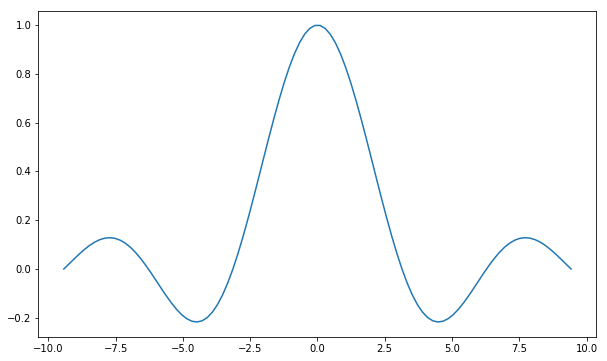

In [2]:
%matplotlib inline
# inline can be replaced by notebook to get interactive plots
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10.0, 6.0) # set figures display bigger
x = np.linspace(- 3*np.pi,3*np.pi,100) 
plt.plot(x,np.sin(x)/x);

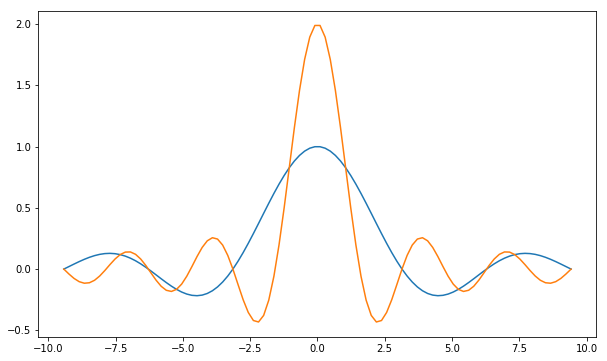

In [3]:
plt.plot(x,np.sin(x)/x,x,np.sin(2*x)/x);

If you have a recent Macbook with a Retina screen, you can display high-resolution plot outputs.
Running the next cell will give you double resolution plot output for Retina screens. 

*Note: the example below won’t render on non-retina screens*

In [4]:
%config InlineBackend.figure_format = 'retina'

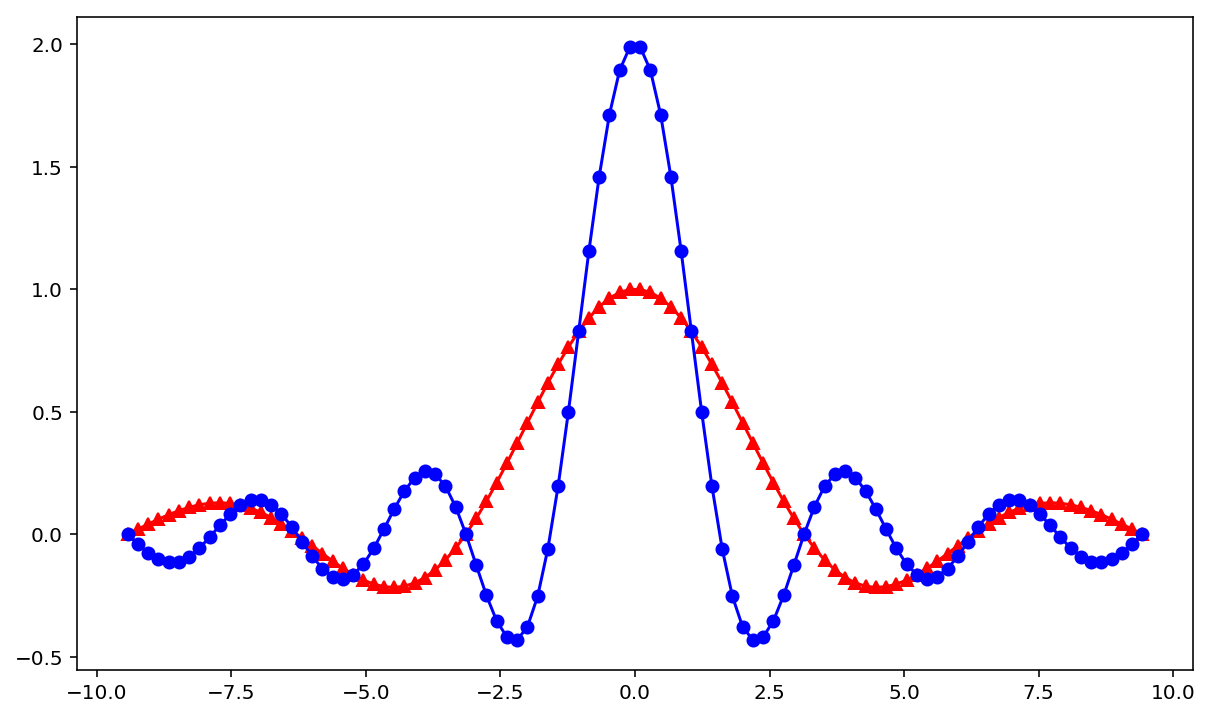

In [5]:
# red, dot-dash, triangles and blue, dot-dash, bullet
plt.plot(x,np.sin(x)/x, 'r-^',x,np.sin(2*x)/x, 'b-o');

# Simple Scatter Plot

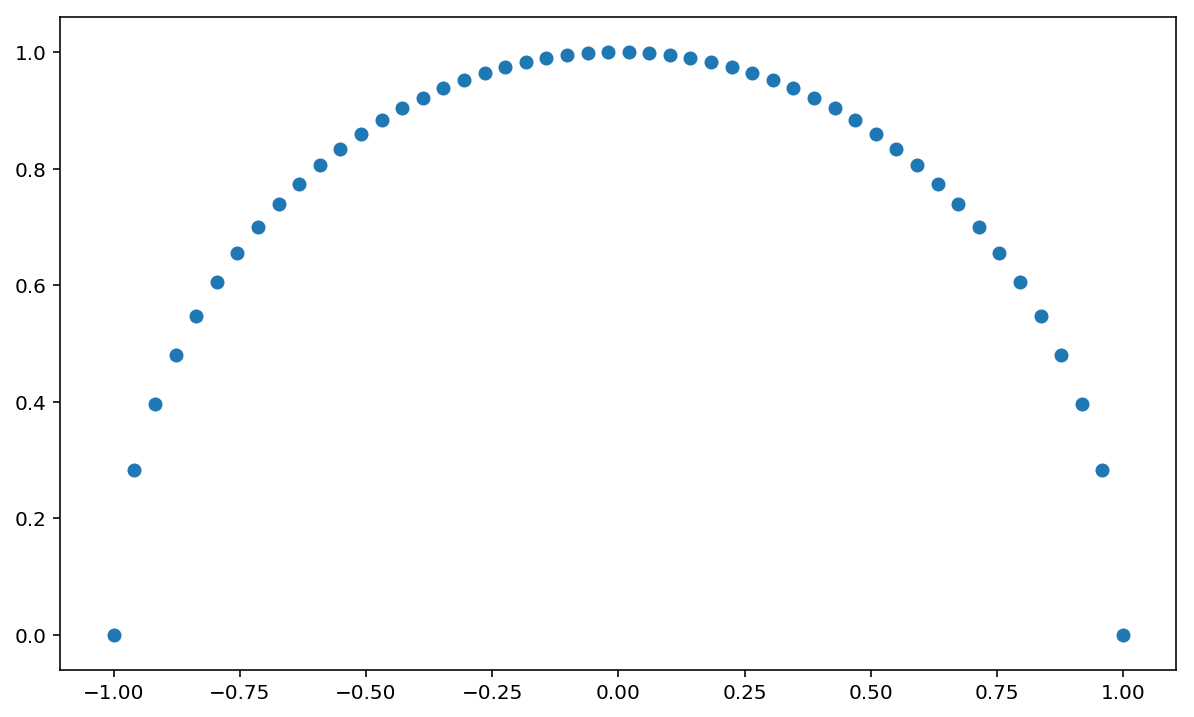

In [6]:
x = np.linspace(-1,1,50)
y = np.sqrt(1-x**2)
plt.scatter(x,y);

# Colormapped Scatter Plot

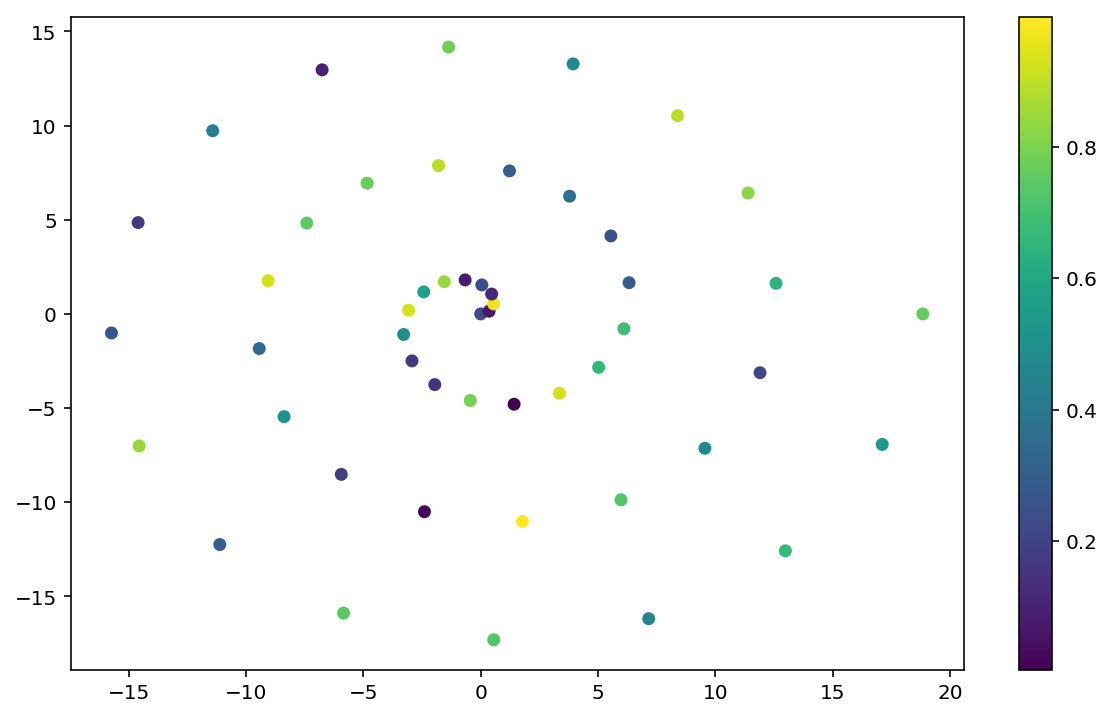

In [7]:
theta = np.linspace(0,6*np.pi,50) # 50 steps from 0 to 6 PI
size = 30*np.ones(50) # array with 50 values set to 30
z = np.random.rand(50) # array with 50 random values in [0,1]
x = theta*np.cos(theta)
y = theta*np.sin(theta)
plt.scatter(x,y,size,z)
plt.colorbar();

# Change Colormap

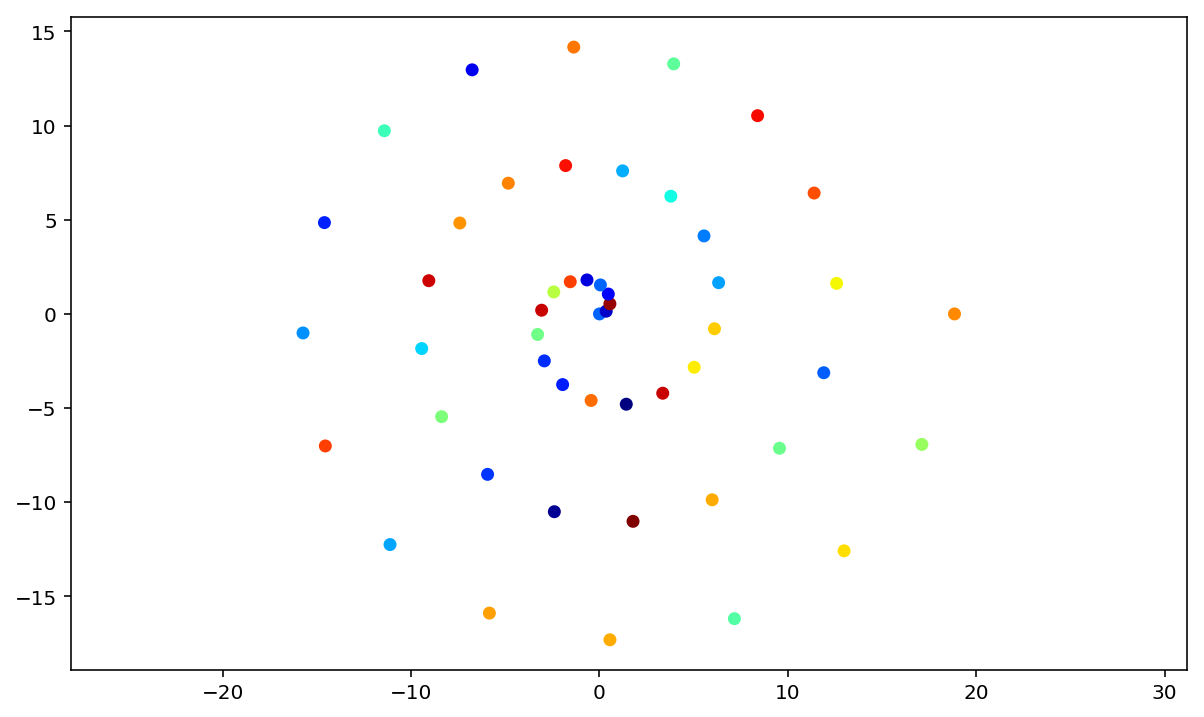

In [8]:
plt.scatter(x,y,size,z,cmap='jet');
plt.axes().set_aspect('equal', 'datalim')


[colormaps](http://matplotlib.org/api/pyplot_summary.html?highlight=colormaps#matplotlib.pyplot.colormaps) in matplotlib documentation.

# Multiple Figures

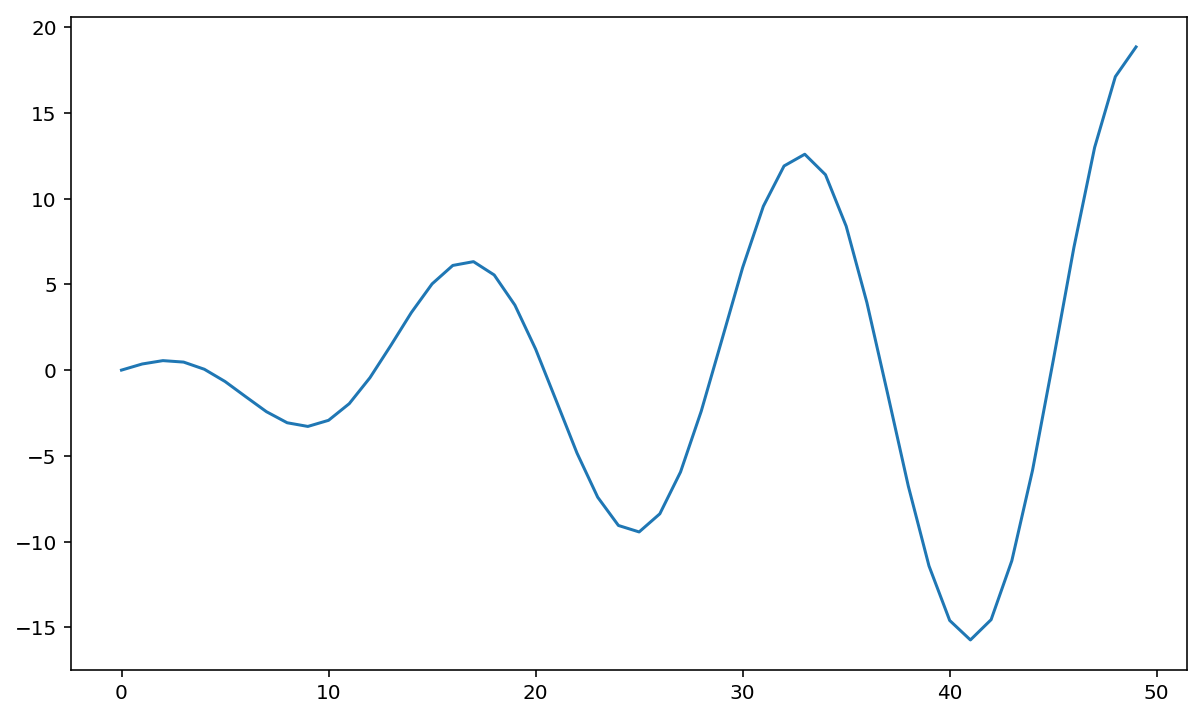

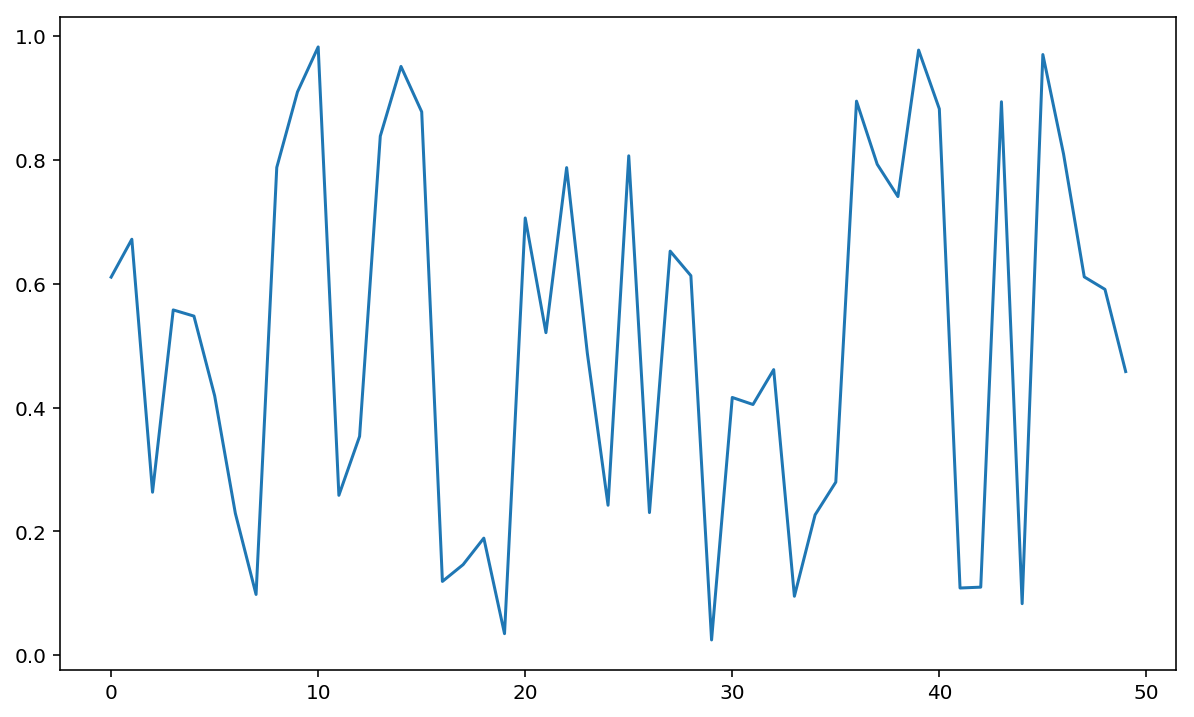

In [11]:
plt.figure()
plt.plot(x)
plt.figure()
plt.plot(z);

# Multiple Plots Using `subplot`

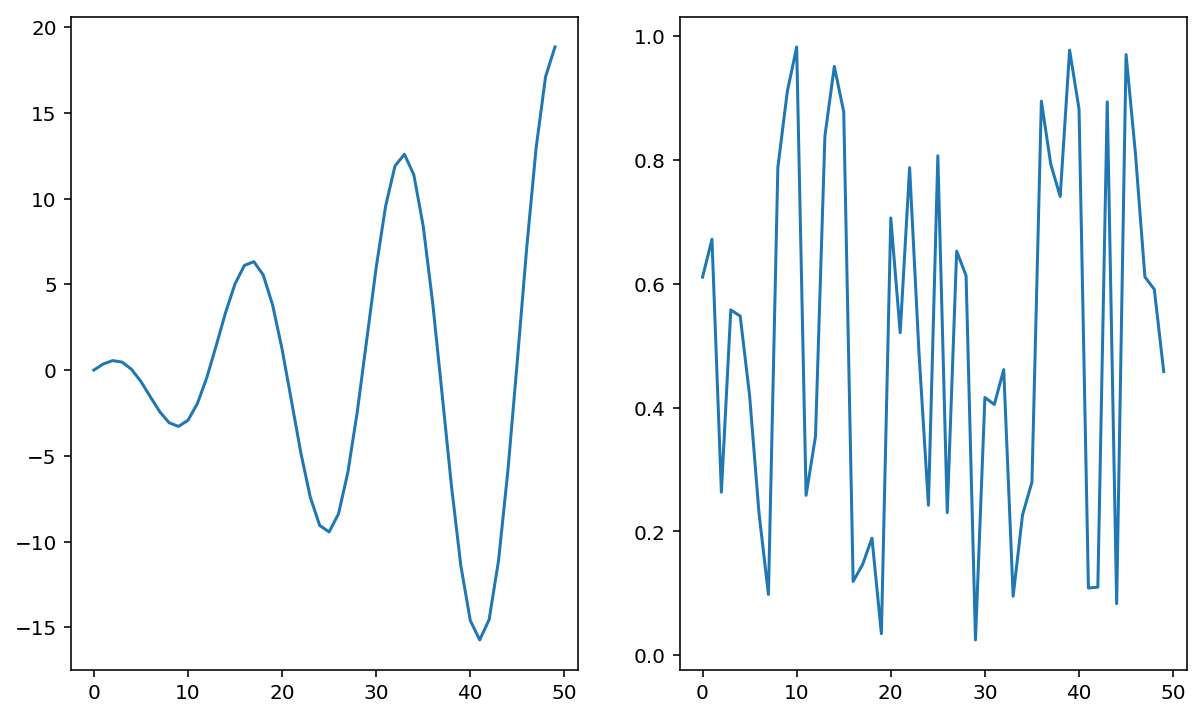

In [12]:
plt.subplot(1,2,1) # 1 row 1, 2 columns, active plot number 1
plt.plot(x)
plt.subplot(1,2,2) # 1 row 1, 2 columns, active plot number 2
plt.plot(z);

# Legends
 - Legends labels with plot

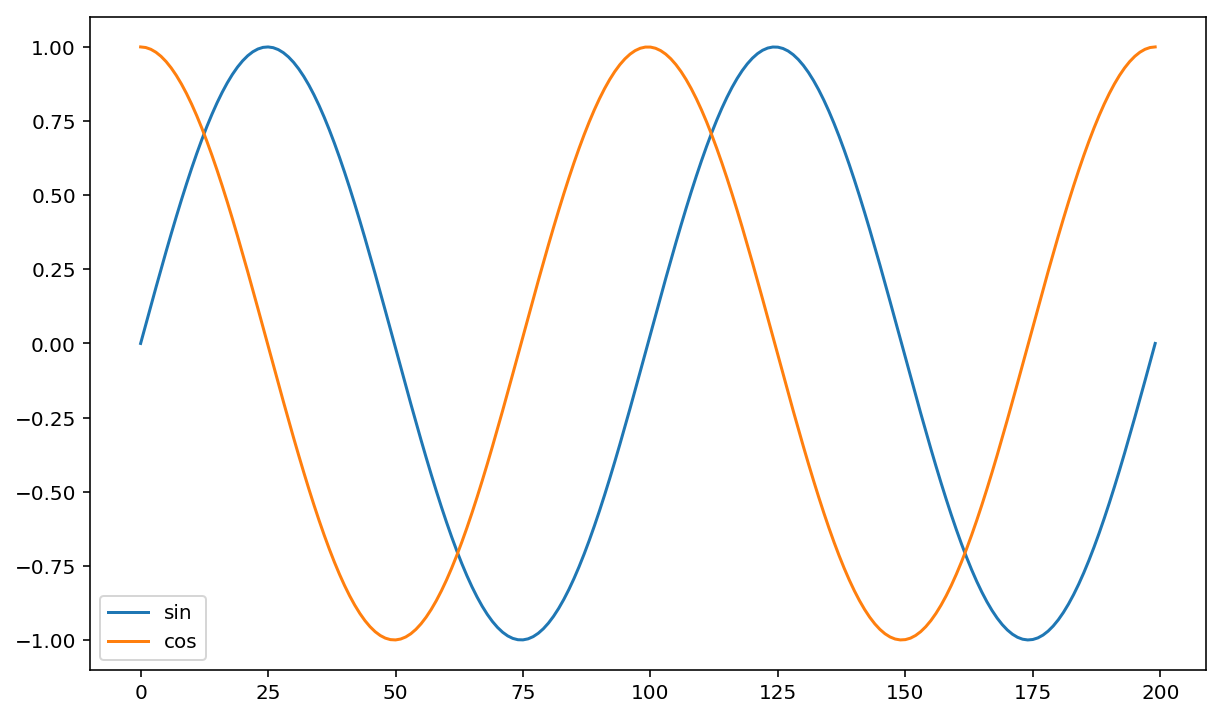

In [13]:
theta =np.linspace(0,4*np.pi,200)
plt.plot(np.sin(theta), label='sin')
plt.plot(np.cos(theta), label='cos')
plt.legend();

- Labelling with `legend`

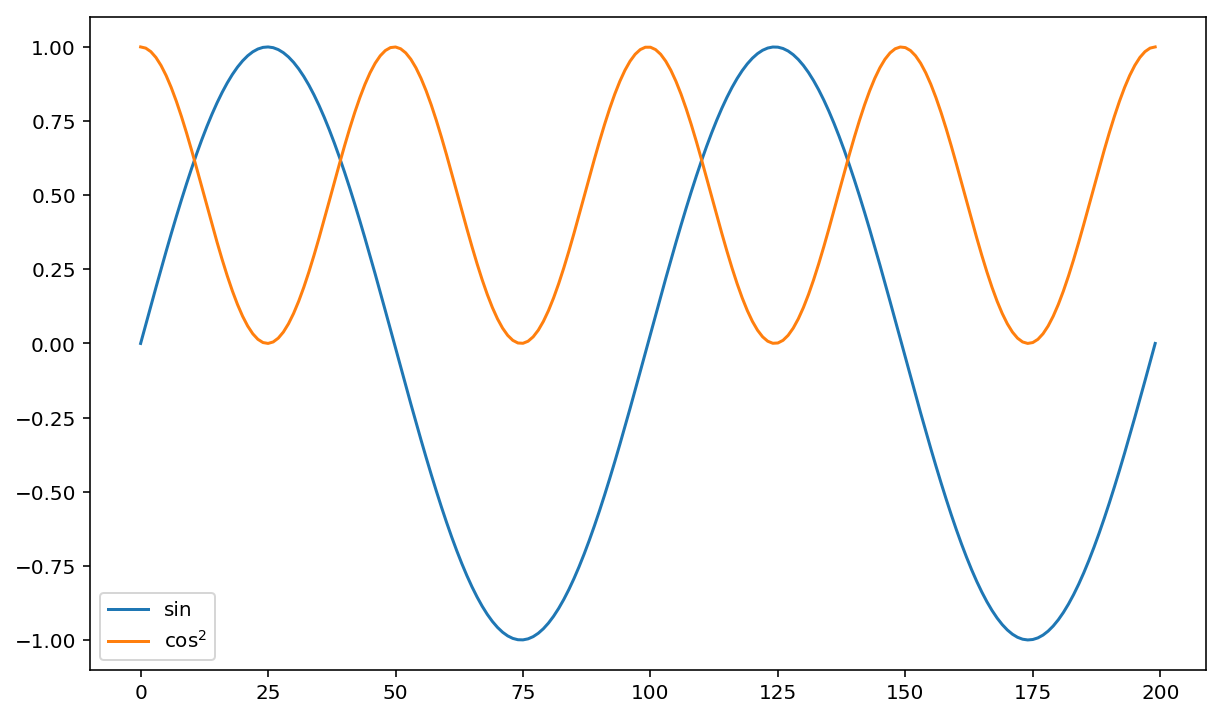

In [14]:
plt.plot(np.sin(theta))
plt.plot(np.cos(theta)**2)
plt.legend(['sin','$\cos^2$']);

# Titles and Axis Labels

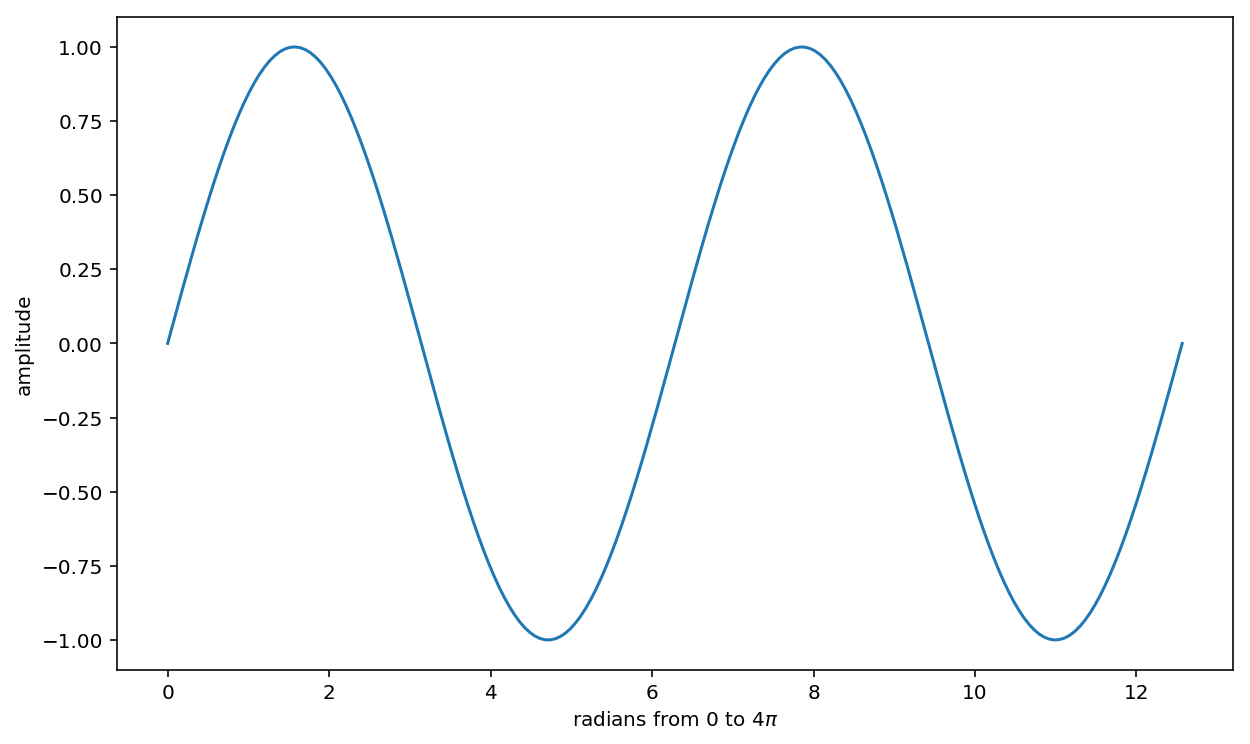

In [15]:
plt.plot(theta,np.sin(theta))
plt.xlabel('radians from 0 to $4\pi$')
plt.ylabel('amplitude');

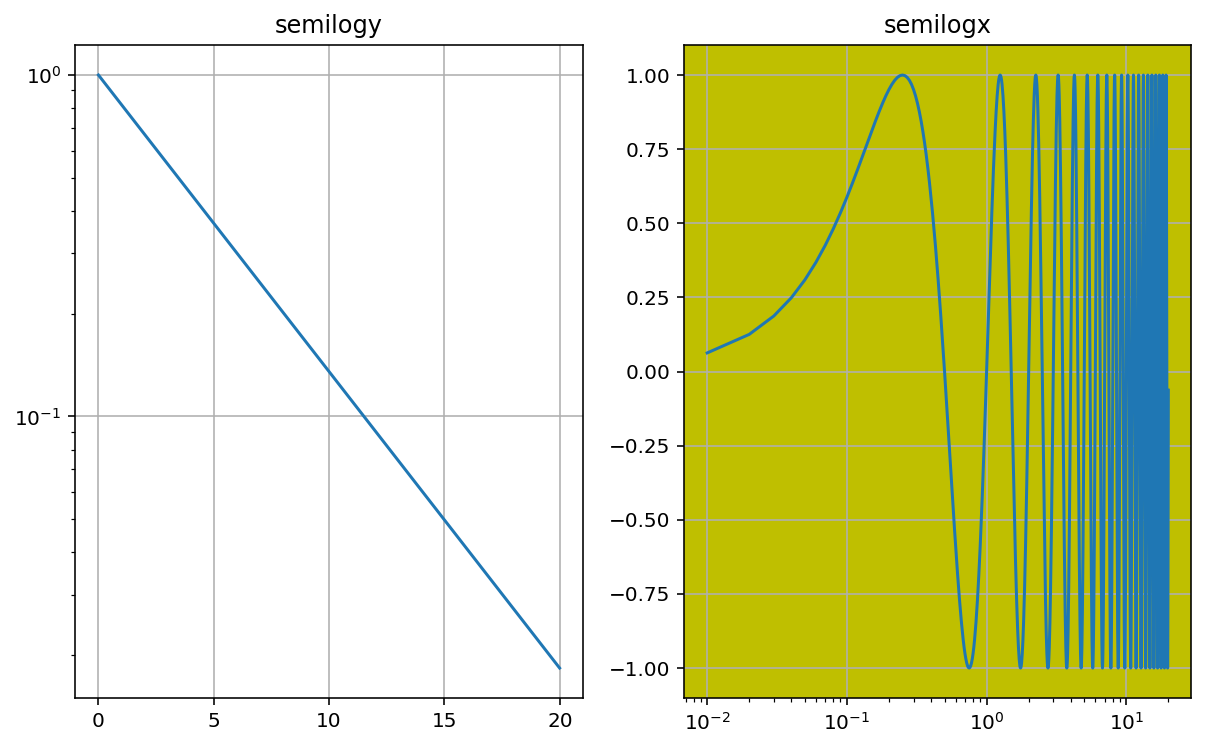

In [16]:
t = np.arange(0.01, 20.0, 0.01)

plt.subplot(121) 
plt.semilogy(t, np.exp(-t/5.0))
plt.title('semilogy')
plt.grid(True)

plt.subplot(122,fc='y') 
plt.semilogx(t, np.sin(2*np.pi*t))
plt.title('semilogx')
plt.grid(True)


# Plot Grid and Save to File

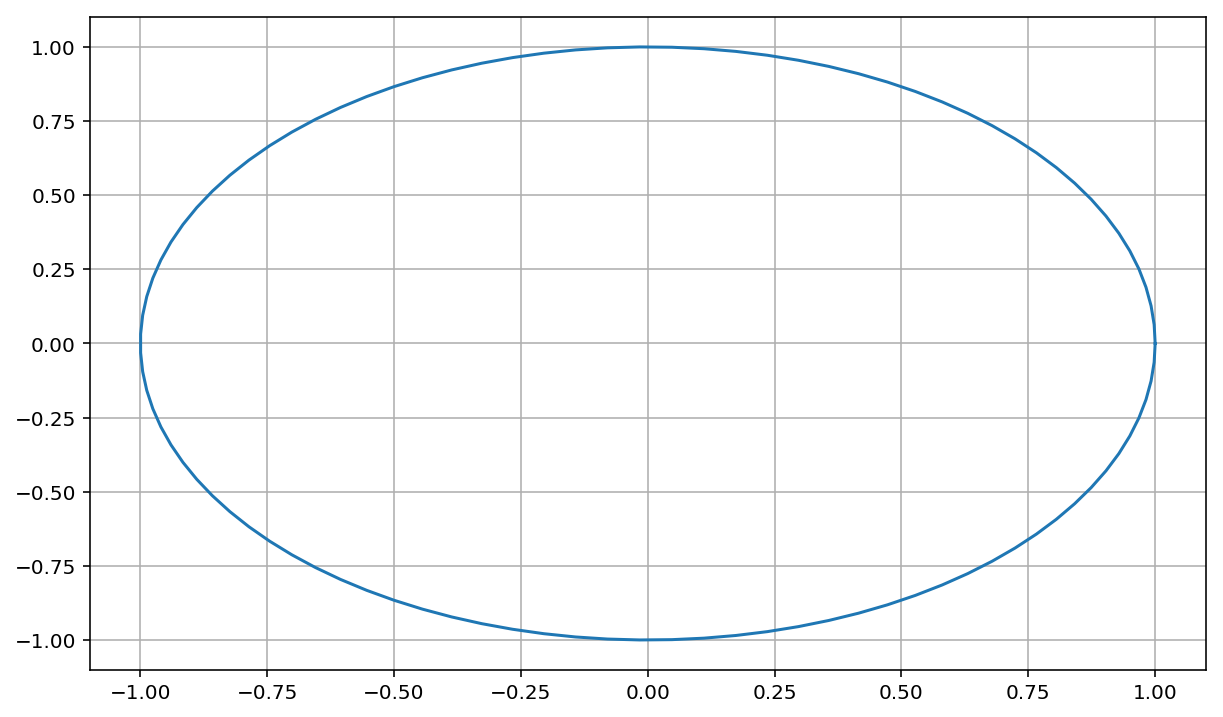

In [17]:
theta = np.linspace(0,2*np.pi,100)
plt.plot(np.cos(theta),np.sin(theta))
plt.grid();


In [19]:
plt.savefig('circle.png');
%ls *.png

circle.png         delicate_arch.png  my_plots.png


# Histogram 

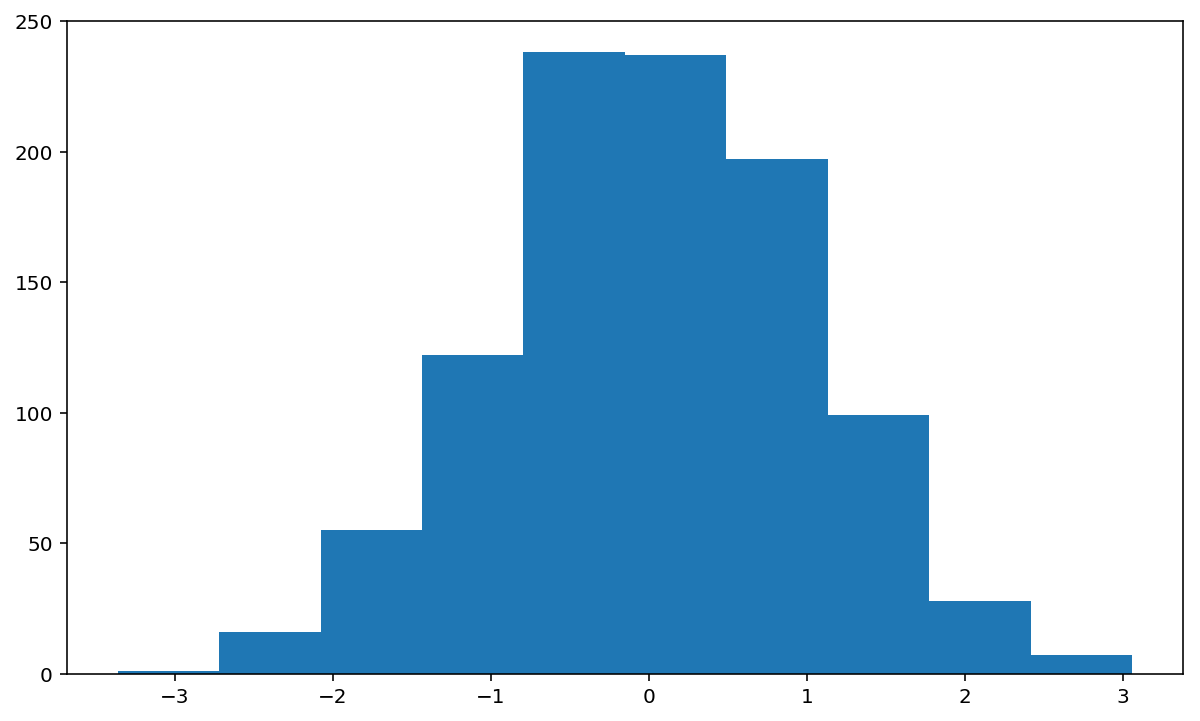

In [20]:
from numpy.random import randn
plt.hist(randn(1000));

Change the number of bins and supress display of returned array with ;


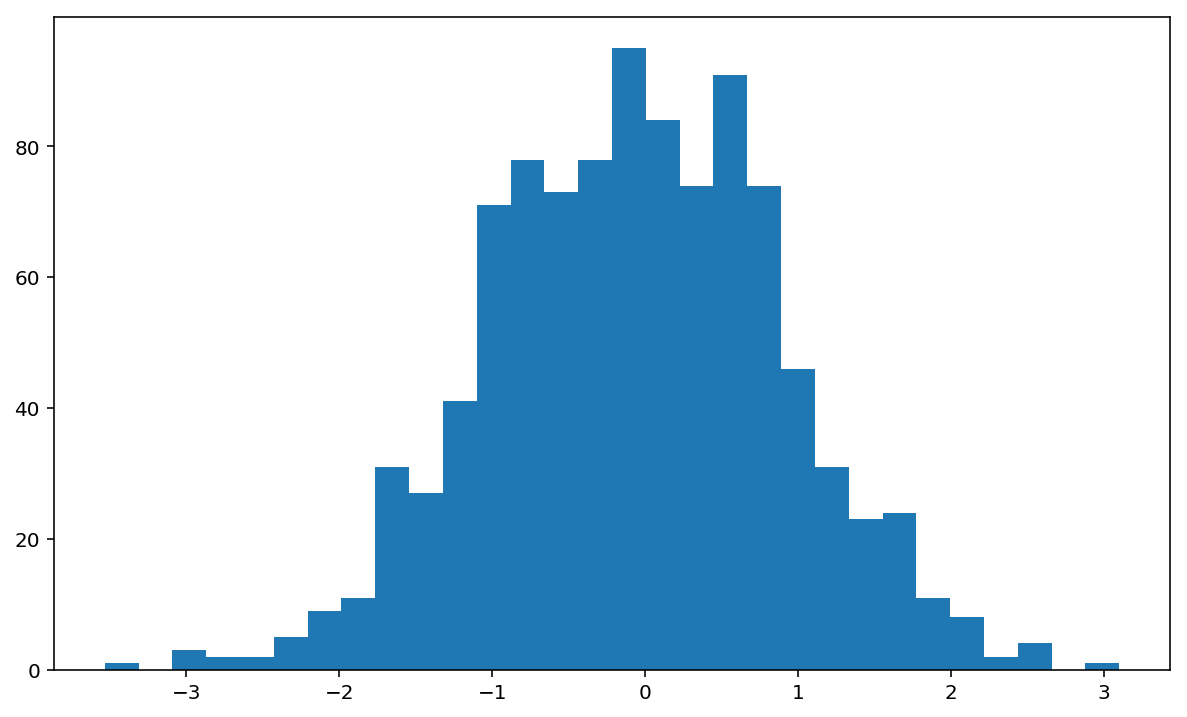

In [21]:
plt.hist(randn(1000), 30);

# Contour Plot

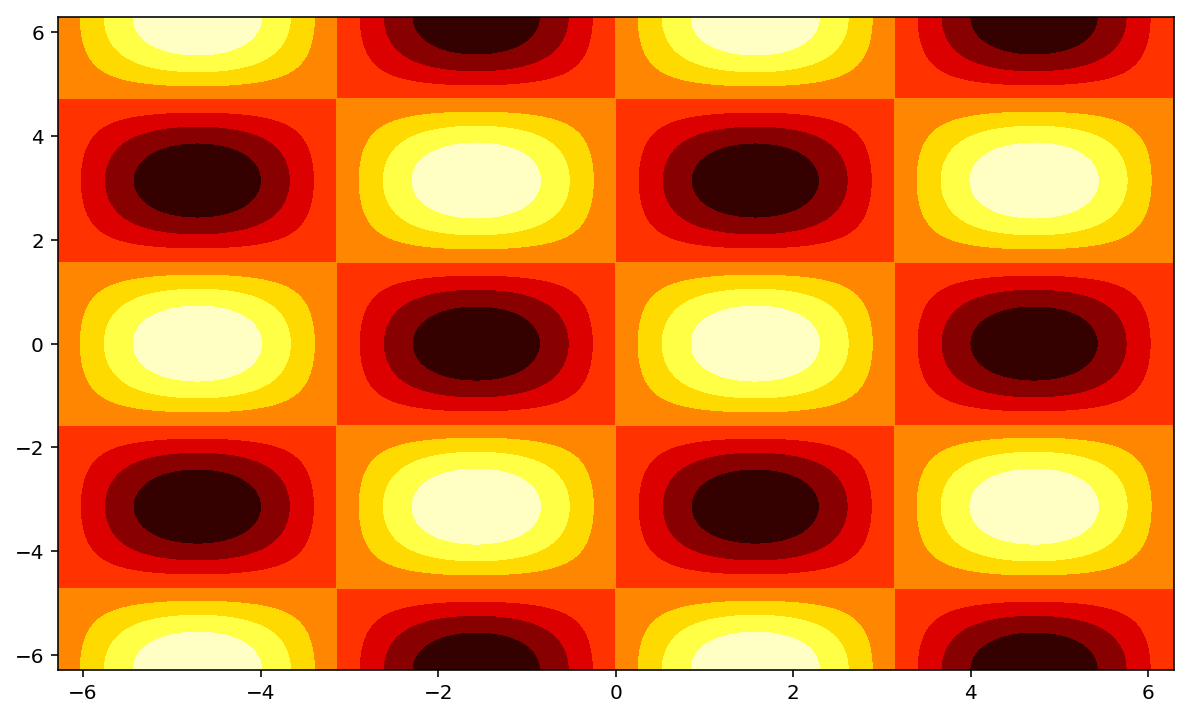

In [22]:
x = y = np.arange(-2.0*np.pi, 2.0*np.pi+0.01, 0.01)
X, Y = np.meshgrid(x, y)
Z = np.sin(X)*np.cos(Y)

plt.contourf(X, Y, Z,cmap=plt.cm.hot);

# Image Display

In [6]:
img = plt.imread("my_plots.png")
plt.imshow(img)
#plt.colorbar();

# Exercise

Recreate the image my_plots.png using the *delicate_arch.png* file.

<button data-toggle="collapse" data-target="#plots" class='btn btn-primary'>Solution</button>
<div id="plots" class="collapse">
```python
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,10)
x = np.linspace(0,2*np.pi, 101)
s = np.sin(x)
c = np.cos(x)
img = plt.imread('delicate_arch.png')
plt.subplot(2,2,1)
plt.plot(x,s,'b-',x,c,'r+')
plt.axis('tight') # Stretch the boundaries to match with data
plt.subplot(2,2,2)
plt.plot(x,s);
plt.grid()
plt.xlabel('radians')
plt.xlabel('amplitude')
plt.title('sin(x)')
plt.axis('tight')
plt.subplot(2,2,3)
plt.imshow(img,  cmap=plt.cm.winter)
plt.tight_layout()
plt.savefig('my_plots.png')
plt.show()
```

# Alternatives

- [bqplot](https://github.com/bloomberg/bqplot/blob/master/README.md) : Jupyter Notebooks, Interactive.
- [seaborn](https://seaborn.pydata.org) : Statistics.
- [toyplot](http://toyplot.readthedocs.io/en/stable/) : Very good for graphes.
- [bokeh](http://bokeh.pydata.org/en/latest/) : Interactive and Server mode.
- [pygal](http://pygal.org/en/stable/) : Charting
- [Mayavi](http://code.enthought.com/projects/mayavi/): 3D 
- [VisIt](http://www.visitusers.org/index.php?title=VisIt-tutorial-Python-scripting): Powerful, easy to use but heavy.
- [Paraview](http://www.itk.org/Wiki/ParaView/Python_Scripting): The most-used visualization application. Need high learning effort.

And [mpld3](https://github.com/mpld3/mpld3), [plot.ly](https://plot.ly/), [Altair](https://github.com/altair-viz/altair), ...


In [5]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,10)
x = np.linspace(0,2*np.pi, 101)
s = np.sin(x)
c = np.cos(x)
img = plt.imread('images/delicate_arch.png')

fig = plt.figure()
plt.subplot(2,2,1)
plt.plot(x,s,'b-',x,c,'r+')
plt.axis('tight') # Stretch the boundaries to match with data
plt.subplot(2,2,2)
plt.plot(x,s);
plt.grid()
plt.xlabel('radians')
plt.xlabel('amplitude')
plt.title('sin(x)')
plt.axis('tight')
plt.subplot(2,2,3)
plt.imshow(img,  cmap=plt.cm.winter)
plt.tight_layout()
plt.savefig('my_plots.png')
plt.show()

AttributeError: 'bool' object has no attribute 'autoscale_None'